In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
test_df = pd.read_csv('raw_datasets/fashion-mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
shirt = np.array(test_df.iloc[0][1:]).reshape(28,28)

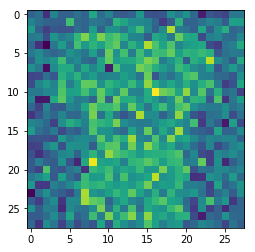

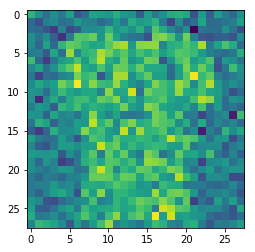

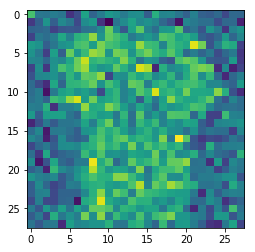

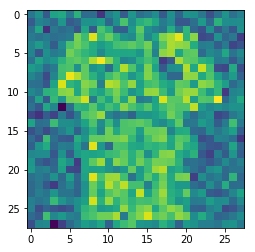

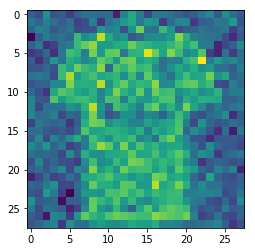

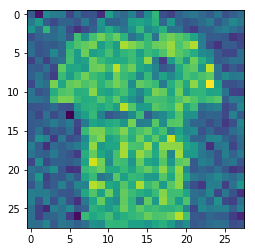

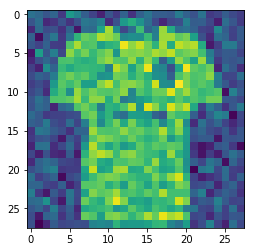

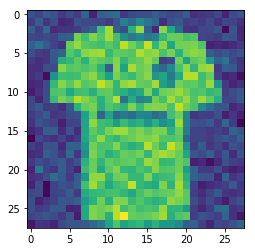

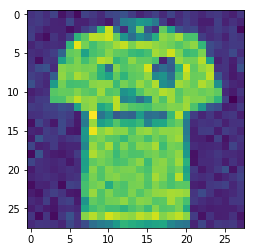

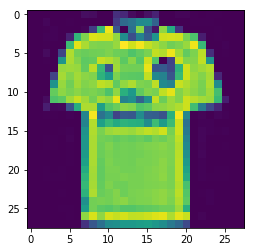

In [4]:
for noise in np.linspace(.5, 0, 10):
    plt.figure()
    plt.imshow(shirt + 255 * noise * np.random.randn(*shirt.shape))

In [5]:
cats = np.array(['tshirt-',
                'trouser-',
                'pullover-',
                'dress-',
                'coat-',
                'sandal-',
                'shirt-',
                'sneaker-',
                'bag-',
                'ankleboot-'])

In [6]:
test_df['cat'] = cats[test_df['label']]
test_df['label'] = np.add(cats[test_df['label']], (test_df.index.astype(str)))

In [7]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cat
0,tshirt-0,0,0,0,0,0,0,0,9,8,...,87,56,0,0,0,0,0,0,0,tshirt-
1,trouser-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,trouser-
2,pullover-2,0,0,0,0,0,0,14,53,99,...,0,0,0,63,53,31,0,0,0,pullover-
3,pullover-3,0,0,0,0,0,0,0,0,0,...,126,140,0,133,224,222,56,0,0,pullover-
4,dress-4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dress-


In [8]:
!mkdir datasets/fashion

mkdir: cannot create directory ‘datasets/fashion’: File exists


In [9]:
for i, df in test_df.groupby(test_df['cat']):
    print(i)
    for j, row in df.iloc[:100].iterrows():
        im_id = row[0]
        im_base = (row[1:-1].astype(int).values).reshape(28, 28)
        for t, noise in enumerate(np.linspace(.5, 0, 10)):
            im = (im_base + 255 * noise * np.random.randn(*shirt.shape))
            cv2.imwrite('datasets/fashion/{}-{}.png'.format(im_id, t), im)
#         break
#     break

ankleboot-
bag-
coat-
dress-
pullover-
sandal-
shirt-
sneaker-
trouser-
tshirt-
